In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/heart.csv')
data.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [ ]:
y = data["output"]
x = data.drop("output", axis=1)

from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression().fit(x, y)
logistic.score(x, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8547854785478548

In [ ]:
x_train, y_train = x[:200], y[:200]

In [ ]:
x_train.shape, y_train.shape

((200, 13), (200,))

In [ ]:
x_test, y_test = x[200:], y[200:]
x_test.shape, y_test.shape

((103, 13), (103,))

In [ ]:
logistic_test = LogisticRegression().fit(x_train, y_train)
logistic_test.score(x_train, y_train), logistic_test.score(x_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.9, 0.5436893203883495)

In [ ]:
N = int(x.shape[0] * 0.8)

x_train, y_train, x_test, y_test = x[:N], y[:N], x[N:], y[N:]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [ ]:
logistic_test = LogisticRegression().fit(x_train, y_train)
logistic_test.score(x_train, y_train), logistic_test.score(x_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8884297520661157, 0.6229508196721312)

In [ ]:
data.tail(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
mask = np.array([True] * N + [False] * (y.shape[0] - N))

In [ ]:
from numpy.random import shuffle

shuffle(mask)
mask

array([ True, False,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True, False,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True,  True, False,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,

In [ ]:
x_train, y_train, x_test, y_test = x[mask], y[mask], x[~mask], y[~mask]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [ ]:
logistic_test = LogisticRegression().fit(x_train, y_train)
logistic_test.score(x_train, y_train), logistic_test.score(x_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8471074380165289, 0.819672131147541)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
y_test_pred = logistic_test.predict(x_test)
y_train_pred = logistic_test.predict(x_train)

In [ ]:
confusion_matrix(y_train, y_train_pred)

array([[ 88,  27],
       [ 11, 116]])

In [ ]:
confusion_matrix(y_test, y_test_pred)

array([[17,  6],
       [ 4, 34]])

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77        23
           1       0.85      0.89      0.87        38

    accuracy                           0.84        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.84      0.83        61



In [ ]:
precision_score(y_test, y_test_pred)

0.85

In [ ]:
metrics = pd.DataFrame({
    "Train": [
        accuracy_score(y_train, y_train_pred),
        precision_score(y_train, y_train_pred),
        recall_score(y_train, y_train_pred),
        f1_score(y_train, y_train_pred),
    ],
    "Test": [
        accuracy_score(y_test, y_test_pred),
        precision_score(y_test, y_test_pred),
        recall_score(y_test, y_test_pred),
        f1_score(y_test, y_test_pred),
    ],
}, index = ["Accuracy", "Precision", "Recall", "F1"])

metrics

,Train,Test
Accuracy,0.842975,0.836066
Precision,0.811189,0.850000
Recall,0.913386,0.894737
F1,0.859259,0.871795


accuracy - точность, доля правильных ответов.

precision - доля истинно положительных обьектов во всех, распознанных как положительные. Характеризует способность модели не помечать положительные объекты как отрицательные (не делать ложно положительных прогнозов). (точность)

recall - доля истинно положительных обьектов во всех положительных. Характеризует способность модели выявлять все положительные объекты (не делать ложно отрицательных прогнозов). (полнота)

f1 - среднее гармоническое между этими двумя метриками.

# Задания для самостоятельного выполнения

## 1. Повторите анализ для других видов моделей. Используйте 5-10 разных классов моделей. Подсчитывайте только метрики на тестовой выборке.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


models = {
    '1. Gradient Boosting': GradientBoostingClassifier(), # Градиентный бустинг
    '2. Decision Tree': DecisionTreeClassifier(), # Деревья принятия решений
    '3. Random Forest': RandomForestClassifier(), # Случайный лес
    '4. SVM': SVC(), # Метод опорных векторов
    '5. KNN': KNeighborsClassifier(), # k-ближайших соседей
    '6. Naive Bayes': GaussianNB(), # Наивный Байесовский классификатор
    '7. Neural Network': MLPClassifier() # Нейронные сети
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1}





from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
from sklearn.linear_model import RidgeCV
model = Ridge()
results_df = pd.DataFrame(results)
results_df

,1. Gradient Boosting,2. Decision Tree,3. Random Forest,4. SVM,5. KNN,6. Naive Bayes,7. Neural Network
Accuracy,0.885246,0.786885,0.901639,0.737705,0.704918,0.934426,0.868852
Precision,0.852941,0.781250,0.878788,0.659574,0.675676,0.909091,0.810811
Recall,0.935484,0.806452,0.935484,1.000000,0.806452,0.967742,0.967742
F1,0.892308,0.793651,0.906250,0.794872,0.735294,0.937500,0.882353


Gradient Boosting: Это метод ансамблирования, который строит последовательность деревьев решений и корректирует их ошибки на основе градиентного спуска. Он особенно хорошо подходит для задач классификации и регрессии, обычно имеет высокую точность и устойчивость к переобучению.

Decision Tree: это древовидная структура, где каждый узел представляет собой тест на атрибуте, каждая ветвь представляет собой результат этого теста, а каждый лист представляет классификацию или регрессию. Они просты в интерпретации, но могут склоняться к переобучению.

Random Forest: Это ансамбль решающих деревьев, где каждое дерево обучается на случайном подмножестве данных и признаков. Они хорошо работают с большими наборами данных, обычно обладают высокой точностью и устойчивостью к переобучению.

SVM (Support Vector Machine): Это метод, который строит гиперплоскость в пространстве признаков, которая наилучшим образом разделяет классы. Он хорошо работает в пространствах высокой размерности и сопряжен с ядровыми функциями для работы с нелинейными данными.

KNN (K-Nearest Neighbors): Это метод классификации, который классифицирует объекты на основе их близости к другим объектам в пространстве признаков. Он прост в реализации и может работать с нелинейными данными, но может быть вычислительно затратным на больших наборах данных.

Naive Bayes: Это вероятностный метод классификации, основанный на теореме Байеса с предположением о независимости признаков. Он прост в реализации и быстр в обучении, но может быть чувствителен к предположению о независимости.

Neural Network: Это модель, инспирированная работой человеческого мозга, которая состоит из слоев нейронов и использует алгоритм обратного распространения ошибки для обучения. Они могут моделировать сложные нелинейные отношения между входными и выходными данными, но требуют большого количества данных и вычислительных ресурсов для обучения.

## 2. Повторите анализ для другого датасета по вашему выбору. Используйте несколько моделей для сравнения. Используйте датасет для множественной классификации.

In [ ]:
from sklearn.datasets import load_wine
wine = load_wine()
X = wine.data
y = wine.target
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Random Forest": RandomForestClassifier(), # Случайный лес
    "K-Nearest Neighbors": KNeighborsClassifier(), # k-ближайших соседей
    "Support Vector Machine": SVC() # Метод опорных векторов
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=wine.target_names)  # создания отчета о классификации с указанием имен классов
    results[name] = report

for name, report in results.items():
    print(f"Model: {name}")
    print(report)
    print("="*55)

Model: Random Forest
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Model: K-Nearest Neighbors
              precision    recall  f1-score   support

     class_0       0.86      0.86      0.86        14
     class_1       0.79      0.79      0.79        14
     class_2       0.38      0.38      0.38         8

    accuracy                           0.72        36
   macro avg       0.67      0.67      0.67        36
weighted avg       0.72      0.72      0.72        36

Model: Support Vector Machine
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       0.73      0.79      0.76        

# 3. Повторите анализ для датасета, предназначенного для решения задачи регрессии. Используйте все метрики качества регрессии, изученные на лекции. Постройте 5 - 10 разных моделей регрессии.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML2.2%20real%20classification/data/diabetes.csv")
y = df.Outcome
x = df.drop(["Outcome"], axis=1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

models = {
    'Gradient Boosting': GradientBoostingClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1}


results_df = pd.DataFrame(results)
results_df

,Gradient Boosting,Decision Tree,Random Forest,SVM,KNN,Naive Bayes,Neural Network
Accuracy,0.785714,0.701299,0.805195,0.785714,0.720779,0.824675,0.707792
Precision,0.785714,0.646154,0.786885,0.847826,0.677419,0.787879,0.794118
Recall,0.676923,0.646154,0.738462,0.600000,0.646154,0.800000,0.415385
F1,0.727273,0.646154,0.761905,0.702703,0.661417,0.793893,0.545455


# Дополнительный задания

## 1. Постройте график зависимости метрик качества классификации из методических указаний от процента выборки, отводимого на тестовую часть.

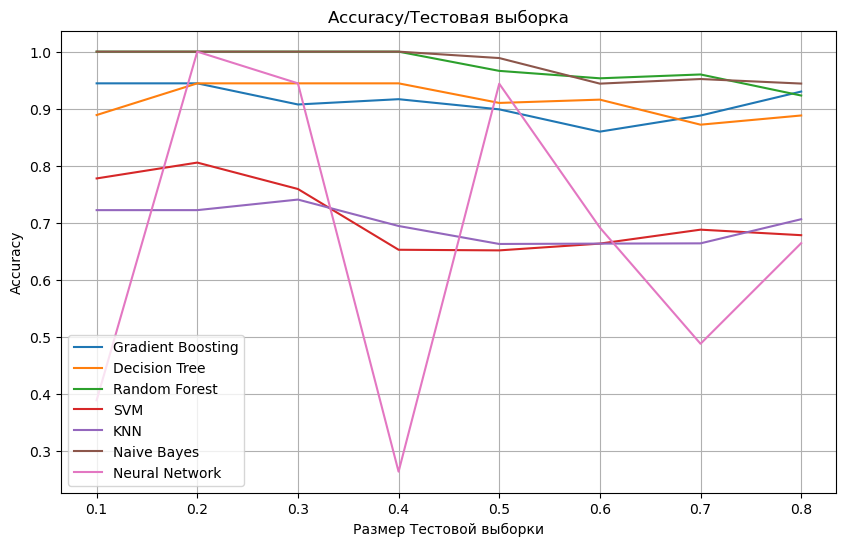

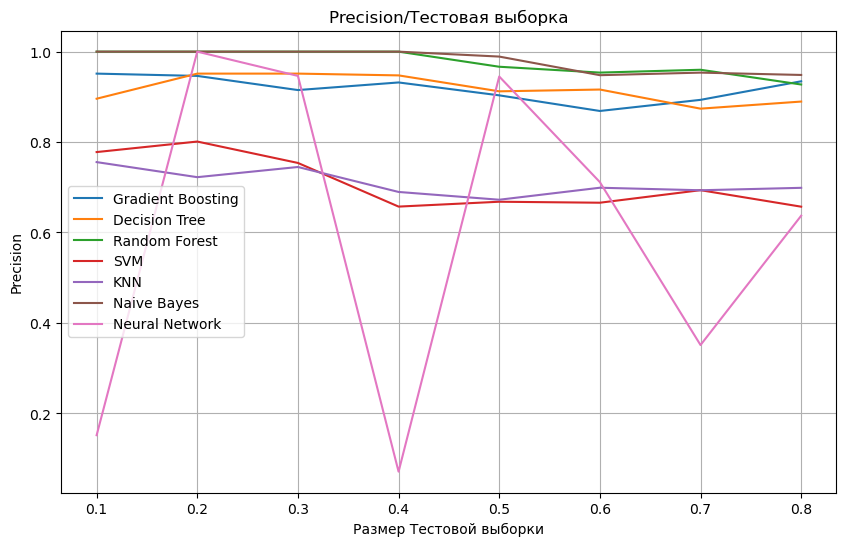

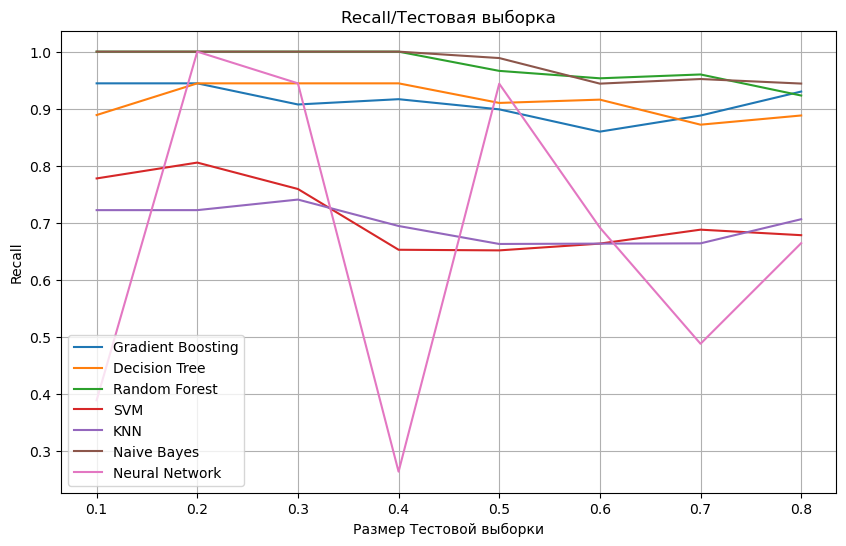

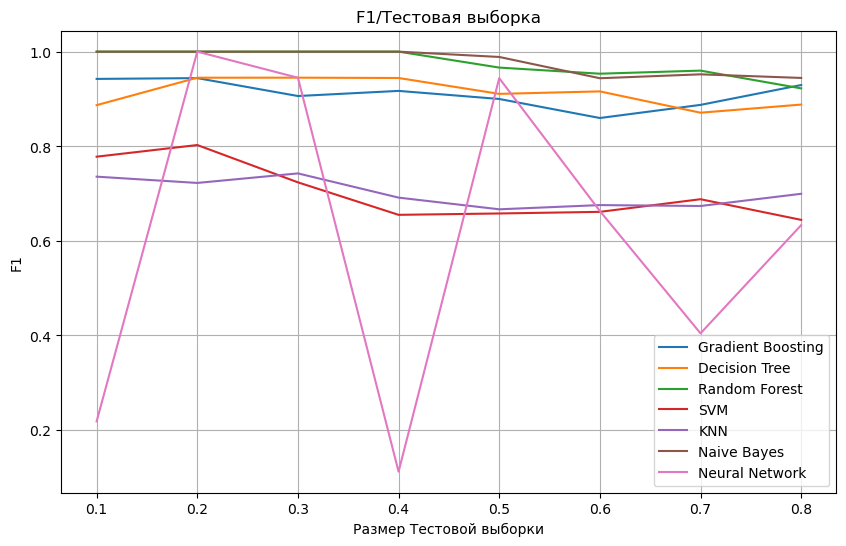

In [ ]:
import matplotlib.pyplot as plt

wine = load_wine()
X = wine.data
y = wine.target

models = {
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier()
}

# Задание диапазона значений процента выборки для тестовой части
test_sizes = np.arange(0.1, 0.9, 0.1)

results = {metric: {model_name: [] for model_name in models.keys()} for metric in ['Accuracy', 'Precision', 'Recall', 'F1']}

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        results['Accuracy'][model_name].append(accuracy)
        results['Precision'][model_name].append(precision)
        results['Recall'][model_name].append(recall)
        results['F1'][model_name].append(f1)

for metric, values in results.items():
    plt.figure(figsize=(10, 6))
    for model_name, scores in values.items():
        plt.plot(test_sizes, scores, label=model_name)
    plt.title(f"{metric}/Тестовая выборка")
    plt.xlabel("Размер Тестовой выборки")
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.show()


## 2. Создайте универсальную функцию, которая подсчитывает все метрики по любой модели и выводит их в виде таблицы.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML2.2%20real%20classification/data/diabetes.csv")
y = df.Outcome
x = df.drop(["Outcome"], axis=1)
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [ ]:
def calculate_metrics(model, X_test, y_test):
    y_test_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    metrics_table = pd.DataFrame({
        'Метрика': ['Accuracy', 'Precision', 'Recall', 'F1'],
        'Значение': [accuracy, precision, recall, f1]
    })

    return metrics_table

In [ ]:
model = LogisticRegression().fit(X_train, y_train)
metrics_table = calculate_metrics(model, X_test, y_test)
metrics_table

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Метрика,Значение
0,Accuracy,0.753247
1,Precision,0.770408
2,Recall,0.753247
3,F1,0.740635


In [ ]:
model = RandomForestClassifier().fit(X_train, y_train)
metrics_table = calculate_metrics(model, X_test, y_test)
metrics_table

,Метрика,Значение
0,Accuracy,0.753247
1,Precision,0.762710
2,Recall,0.753247
3,F1,0.743805


## 3. Создайте функцию, принимающая на вход датасет, которая проверяет наибольшее количество разных моделей машинного обучения и выдающая датафрейм с таблицей всех метрик.

In [ ]:
pip install xgboost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression


def evaluate_models(dataset):
    X = dataset.drop(columns=['Outcome'])
    y = dataset['Outcome']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = {
        'Logistic Regression': LogisticRegression(),
        'Gradient Boosting': GradientBoostingClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'SVM': SVC(),
        'KNN': KNeighborsClassifier(),
        'Naive Bayes': GaussianNB(),
        'Neural Network': MLPClassifier(),
        'XGBoost': XGBClassifier(),
        'AdaBoost': AdaBoostClassifier(),
        'Extra Trees': ExtraTreesClassifier(),
        'Gaussian Process': GaussianProcessClassifier(kernel=RBF()),
        'AdaBoost with Decision Tree Stumps': AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))
    }

    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_test_pred)
        precision = precision_score(y_test, y_test_pred, average='weighted')
        recall = recall_score(y_test, y_test_pred, average='weighted')
        f1 = f1_score(y_test, y_test_pred, average='weighted')
        results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1}

    results_df = pd.DataFrame(results)
    return results_df


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML2.2%20real%20classification/data/diabetes.csv")
evaluation_results = evaluate_models(df)
evaluation_results

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


,Logistic Regression,Gradient Boosting,Decision Tree,Random Forest,SVM,KNN,Naive Bayes,Neural Network,XGBoost,AdaBoost,Extra Trees,Gaussian Process,AdaBoost with Decision Tree Stumps
Accuracy,0.746753,0.746753,0.740260,0.746753,0.766234,0.662338,0.766234,0.694805,0.707792,0.733766,0.753247,0.759740,0.733766
Precision,0.750154,0.750154,0.750916,0.745767,0.761336,0.671225,0.770664,0.691338,0.717466,0.734876,0.751408,0.755907,0.734876
Recall,0.746753,0.746753,0.740260,0.746753,0.766234,0.662338,0.766234,0.694805,0.707792,0.733766,0.753247,0.759740,0.733766
F1,0.748167,0.748167,0.743596,0.746228,0.758601,0.665794,0.767925,0.692804,0.711179,0.734290,0.752196,0.756979,0.734290
